In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import colors

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [3]:
layer_source = np.zeros((1024,1024),dtype=np.float32)
layer_receiver = np.zeros((1024,1024),dtype=np.float32)
layer = np.zeros((1024,1024),dtype=np.float32)


In [4]:
# 震源位置
layer[0:16,512-8:512+8] = 1
layer_source[0:16,512-8:512+8] = 1

In [5]:
# 检波器位置
layer[24:38,0:14] = 2
layer[24:38,1010:] = 2
layer_receiver[24:38,0:14] = 2
layer_receiver[24:38,1010:] = 2
for i in range(1,32):
    layer[24:38,i*32-7:i*32+7]=2
    layer_receiver[24:38,i*32-7:i*32+7]=2


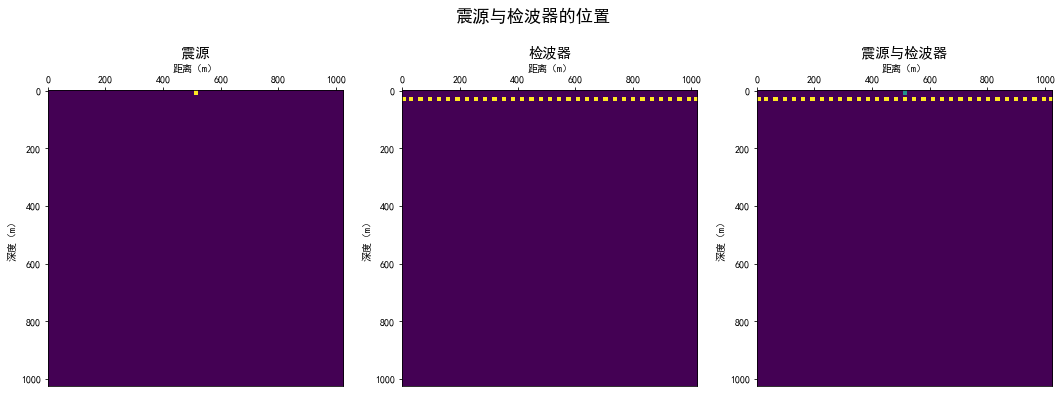

In [60]:
plt.figure(figsize=(18,12))
plt.subplot(1, 3, 1)
plt.suptitle('震源与检波器的位置',y=0.77,fontsize='xx-large')
plt.title("震源",fontsize='x-large')
plt.ylabel("深度（m）")
plt.xlabel("距离（m）")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.imshow(layer_source)
plt.subplot(1, 3, 2)
plt.title("检波器",fontsize='x-large')
plt.ylabel("深度（m）")
plt.xlabel("距离（m）")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.imshow(layer_receiver)
plt.subplot(1, 3, 3)
plt.title("震源与检波器",fontsize='x-large')
plt.ylabel("深度（m）")
plt.xlabel("距离（m）")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.imshow(layer)
plt.savefig(r'E:\tools\写论文\图表数据\震源与检波器位置.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

In [9]:
data1 = np.fromfile(r'E:\tools\写论文\datas\model_sd_6418.vp', dtype=np.float32)
vpdata1 = data1.reshape(512, 512)
data2 = np.fromfile(r'E:\tools\写论文\datas\model_qx_sd_1.vp', dtype=np.float32)
vpdata2 = data2.reshape(512, 512)
data3 = np.fromfile(r'E:\tools\写论文\datas\model_qx_sd_468.vp', dtype=np.float32)
vpdata3 = data3.reshape(512, 512)
vpdatas = [vpdata2.T,vpdata3.T,vpdata1.T]

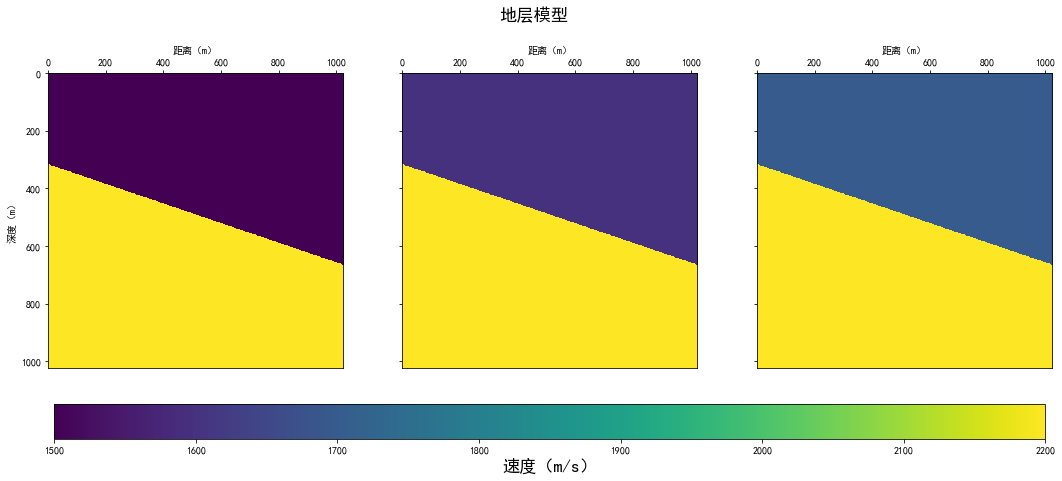

In [41]:

Nr = 1
Nc = 3

fig, axs = plt.subplots(Nr, Nc,figsize=(18, 12))
fig.suptitle('地层模型',y=0.75,fontsize='xx-large')
images = []
# for i in range(Nr):
for j in range(Nc):
    # Generate data with a range that varies from one plot to the next.
    axs[j].xaxis.set_ticks_position('top')
    axs[j].set_xlabel('距离（m）')
    axs[j].set_ylabel('深度（m）')
    axs[j].set_xticks([0,100,200,300,400,500])
    axs[j].set_xticklabels([0,200,400,600,800,1000])
    axs[j].set_yticks([0,100,200,300,400,500])
    axs[j].set_yticklabels([0,200,400,600,800,1000])
    axs[j].xaxis.set_label_position('top')
    images.append(axs[j].imshow(vpdatas[j]))
    axs[j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)
    
position=fig.add_axes([0.13, 0.25, 0.765, 0.04])#位置[x,y,宽,高]
cbar  = fig.colorbar(images[0], ax=axs,cax=position, orientation='horizontal', fraction=.4)
cbar.set_label('速度（m/s）',fontsize='xx-large')

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())
        


for im in images:
    im.callbacksSM.connect('changed', update)
    
plt.savefig(r'E:\tools\写论文\图表数据\地层模型.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)
plt.show()


In [51]:
count = 0
l,r = 160,334
vpdata = np.zeros((512, 512), dtype=np.float32)
depths = np.linspace(l, r, 512)
for speed in [1500, 1600, 1700, 1800]:
    for i, depth in enumerate(depths):
        vpdata[i][0:int(depth)] = speed
        vpdata[i][int(depth):] = 2200
    vsdata = vpdata / np.sqrt(3)
    rhodata = 0.31 * vpdata ** (1 / 4) * 1000
    # 保存模型为32float的二进制文件：
    vpdata.tofile(r'things\model_sd_' + str(count) + '.vp')
#     vsdata.tofile(r'things\model_sd_' + str(count) + '.vs')
#     rhodata.tofile(r'things\model_sd_' + str(count) + '.rho')
    count += 1

In [28]:
data1 = np.fromfile(r'E:\tools\写论文\图表数据\things\model_sd_0.vp', dtype=np.float32)
vpdata1 = data1.reshape(512, 512)
data2 = np.fromfile(r'E:\tools\写论文\图表数据\things\model_sd_1.vp', dtype=np.float32)
vpdata2 = data2.reshape(512, 512)
data3 = np.fromfile(r'E:\tools\写论文\图表数据\things\model_sd_2.vp', dtype=np.float32)
vpdata3 = data3.reshape(512, 512)
data4 = np.fromfile(r'E:\tools\写论文\图表数据\things\model_sd_3.vp', dtype=np.float32)
vpdata4 = data3.reshape(512, 512)
vpdatas = [vpdata1.T,vpdata2.T,vpdata3.T,vpdata3.T]

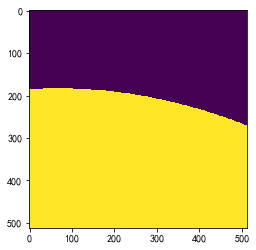

In [53]:
plt.imshow(vpdata1.T)

FileNotFoundError: [Errno 2] No such file or directory: 'things/同结构下不同速度的地层模型.jpg'

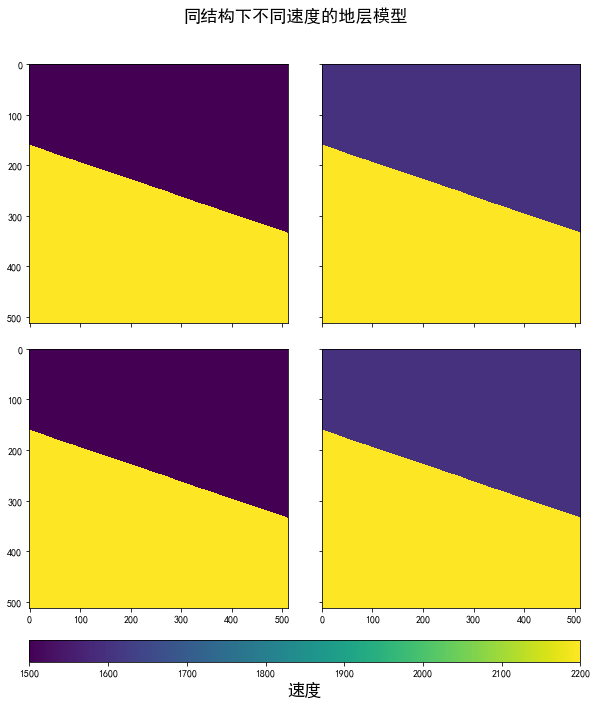

In [31]:
Nr = 2
Nc = 2

fig, axs = plt.subplots(Nr, Nc,figsize=(10, 10))
fig.suptitle('同结构下不同速度的地层模型',y=0.94,fontsize='xx-large')

images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        images.append(axs[i,j].imshow(vpdatas[j]))
        axs[i,j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)
    
position=fig.add_axes([0.13, 0.05, 0.765, 0.03])#位置[左,下,右,上]
cbar  = fig.colorbar(images[0], ax=axs, cax=position, orientation='horizontal', fraction=.2)
cbar.set_label('速度',fontsize='xx-large')

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(r'things/同结构下不同速度的地层模型.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)
plt.show()


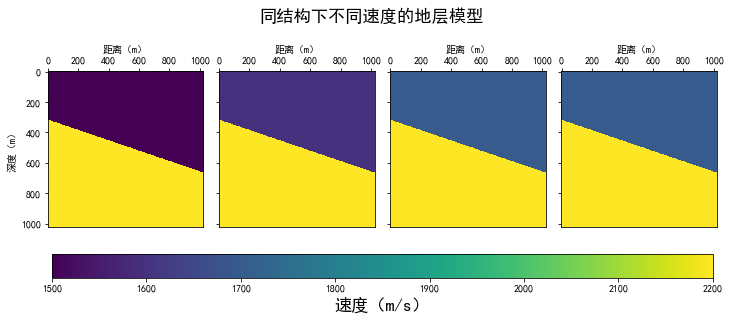

In [37]:
Nr = 1
Nc = 4

fig, axs = plt.subplots(Nr, Nc,figsize=(12, 8))
fig.suptitle('同结构下不同速度的地层模型',y=0.75,fontsize='xx-large')

images = []
# for i in range(Nr):
for j in range(Nc):
    # Generate data with a range that varies from one plot to the next.
    axs[j].xaxis.set_ticks_position('top')
    axs[j].set_xlabel('距离（m）')
    axs[j].set_ylabel('深度（m）')
    axs[j].set_xticks([0,100,200,300,400,500])
    axs[j].set_xticklabels([0,200,400,600,800,1000])
    axs[j].set_yticks([0,100,200,300,400,500])
    axs[j].set_yticklabels([0,200,400,600,800,1000])
    axs[j].xaxis.set_label_position('top')
    images.append(axs[j].imshow(vpdatas[j]))
    axs[j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)
    
position=fig.add_axes([0.13, 0.28, 0.765, 0.04])#位置[左,y,右,高]
cbar  = fig.colorbar(images[0], ax=axs, cax=position, orientation='horizontal', fraction=.2)
cbar.set_label('速度（m/s）',fontsize='xx-large')

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(r'E:\tools\写论文\图表数据\同结构下不同速度的地层模型2.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)
plt.show()


In [5]:
count = 0
vpdata = np.zeros((512, 512), dtype=np.float32)
x = np.random.randint(128, 384, size=(3))
y = np.random.randint(256, 384, size=(3))
x[0] = 0
x[2] = 511
z1 = np.polyfit(x, y, 2)
p1 = np.poly1d(z1)
depths = np.round(p1([i for i in range(512)])).astype(np.int32)
if np.max(depths) > 511 or np.min(depths) < 0:
    print("no")
else:
    max_depth = np.max(depths)
    min_depth = np.min(depths)
    change_up = int(min_depth / 3)
    change_deep = int((512 - max_depth) / 2)
    for depth_change in [-change_up, -2 * change_up, 0, change_deep]:
        for speed in [1500, 1600, 1700, 1800]:
            for i, depth in enumerate(depths + depth_change):
                vpdata[i][0:depth] = speed
                vpdata[i][depth:] = 2200
            vsdata = vpdata / np.sqrt(3)
            rhodata = 0.31 * vpdata ** (1 / 4) * 1000
            # 保存模型为32float的二进制文件：
#             vpdata.tofile(r'things\model_sd_xb_' + str(count) + '.vp')
            
            count = count+1

In [42]:
vpdatas = []
for i in range(16):
    data = np.fromfile(r'E:\tools\写论文\图表数据\things\model_sd_xb_'+str(i)+'.vp', dtype=np.float32)
    vpdata = data.reshape(512, 512)
    vpdatas.append(vpdata.T)

In [9]:
len(vpdatas)

16

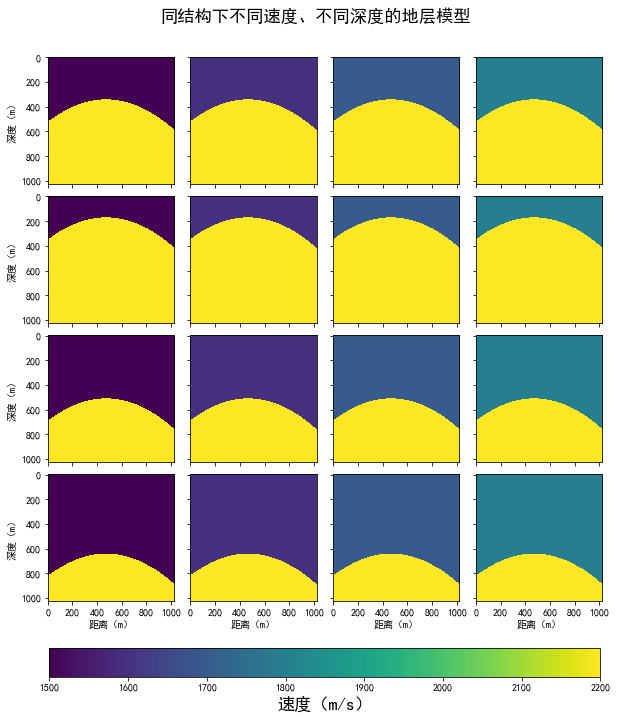

In [54]:
Nr = 4
Nc = 4

fig, axs = plt.subplots(Nr, Nc,figsize=(10, 10))
fig.suptitle('同结构下不同速度、不同深度的地层模型',y=0.95,fontsize='xx-large')

images = []

for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
#         axs[i,j].xaxis.set_ticks_position('top')
        axs[i,j].set_xlabel('距离（m）')
        axs[i,j].set_ylabel('深度（m）')
        axs[i,j].set_xticks([0,100,200,300,400,500])
        axs[i,j].set_xticklabels([0,200,400,600,800,1000])
        axs[i,j].set_yticks([0,100,200,300,400,500])
        axs[i,j].set_yticklabels([0,200,400,600,800,1000])
#         axs[i,j].xaxis.set_label_position('top')
        images.append(axs[i,j].imshow(vpdatas[i*4+j]))
        axs[i,j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)
    
position=fig.add_axes([0.13, 0.02, 0.765, 0.04])#位置[x,y,宽,高]
cbar  = fig.colorbar(images[0], ax=axs, cax=position, orientation='horizontal', fraction=.2)
cbar.set_label('速度（m/s）',fontsize='xx-large')

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(r'E:\tools\写论文\图表数据\同结构下不同速度、不同深度的地层模型.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)
plt.show()
